In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Librerias para graficar
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv",sep=";", index_col="Id", na_values=["?","-"])
data

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073.0,20000.0,Female,2,Married,24.0,2.0,1.0,1.0,0.0
2,38414.0,120000.0,Female,2,Single,26.0,3.0,0.0,10.0,9.0
3,17341.0,90000.0,Female,2,Single,34.0,7.0,1.0,3.0,4.0
4,40496.0,50000.0,Female,2,Married,37.0,5.0,1.0,1.0,NaN
5,47437.0,50000.0,Male,2,Married,57.0,6.0,0.0,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...
656,51108.0,280000.0,Male,2,Married,39.0,10.0,1.0,10.0,0.0
657,60732.0,290000.0,Female,3,Single,27.0,10.0,1.0,13.0,2.0
658,53834.0,190000.0,Female,1,Single,28.0,8.0,1.0,9.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer             658 non-null    float64
 1   Limit_bal            659 non-null    float64
 2   Sex                  659 non-null    object 
 3   Education            659 non-null    object 
 4   Marriage             657 non-null    object 
 5   Age                  659 non-null    float64
 6   Total_Credit_Cards   658 non-null    float64
 7   Total_visits_bank    656 non-null    float64
 8   Total_visits_online  659 non-null    float64
 9   Total_calls_made     658 non-null    float64
dtypes: float64(7), object(3)
memory usage: 56.7+ KB


### Exploración de columnas

#### Transformación de columnas cualitativas

Data antes del procesamiento
 Female    372
Male      273
F           3
Mael        3
M           3
f           2
Fmale       1
9           1
Femael      1
Name: Sex, dtype: int64
Data después del procesamiento



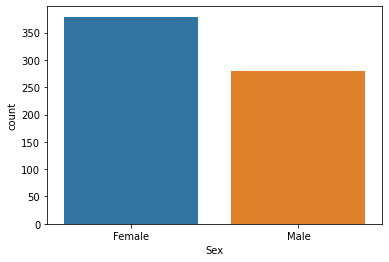

In [4]:
print("Data antes del procesamiento\n",data["Sex"].value_counts())
data["Sex"] = data["Sex"].replace("M","Male")
data["Sex"] = data["Sex"].replace("M ","Male")
data["Sex"] = data["Sex"].replace("Mael","Male")
data["Sex"] = data["Sex"].replace("F","Female")
data["Sex"] = data["Sex"].replace("f","Female")
data["Sex"] = data["Sex"].replace("Fmale","Female")
data["Sex"] = data["Sex"].replace("Femael","Female")
data["Sex"] = data["Sex"].replace("9",np.nan)
print("Data después del procesamiento\n")
ax = sns.countplot(x="Sex", data=data)

Data antes del procesamiento
 2      288
1      264
3       99
5        3
6        2
4        2
ABC      1
Name: Education, dtype: int64
Data después del procesamiento



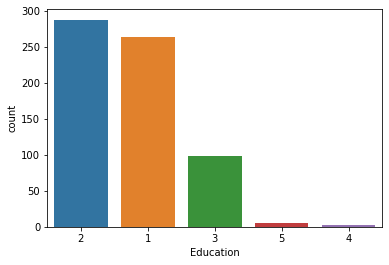

In [5]:
print("Data antes del procesamiento\n",data["Education"].value_counts())
data["Education"] = data["Education"].replace("ABC",np.nan)
data["Education"] = data["Education"].replace("6","5")
print("Data después del procesamiento\n")
ax = sns.countplot(x="Education", data=data)

Data antes del procesamiento
 Single     379
Married    260
Others       9
1            5
2            3
0            1
Name: Marriage, dtype: int64
Data después del procesamiento



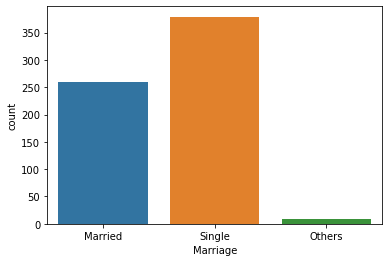

In [6]:
print("Data antes del procesamiento\n",data["Marriage"].value_counts())
data["Marriage"] = data["Marriage"].replace("1",np.nan)
data["Marriage"] = data["Marriage"].replace("2",np.nan)
data["Marriage"] = data["Marriage"].replace("0",np.nan)
print("Data después del procesamiento\n")
ax = sns.countplot(x="Marriage", data=data)

#### Transformación columnas cuantitativas

In [7]:
data_numeric=data[["Customer","Limit_bal","Age","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]]
data_numeric.describe()

,Customer,Limit_bal,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,658.000000,659.000000,659.000000,6.580000e+02,656.00000,659.000000,658.000000
mean,55180.056231,170000.000000,95.218513,1.876290e+05,2.41311,2.602428,3.579027
std,25651.348197,129739.041329,1432.660847,4.812847e+06,1.63130,2.936469,2.868076
min,11265.000000,10000.000000,21.000000,1.000000e+00,0.00000,0.000000,0.000000
25%,33875.500000,50000.000000,28.000000,3.000000e+00,1.00000,1.000000,1.000000
50%,53907.000000,140000.000000,33.000000,5.000000e+00,2.00000,2.000000,3.000000
75%,77321.500000,240000.000000,41.000000,6.000000e+00,4.00000,4.000000,5.000000
max,99843.000000,630000.000000,36745.000000,1.234568e+08,5.00000,15.000000,10.000000


SE ouede observar que el máximo de la edad es muy alto teniendo en cuenta la realidad y por lo tanto hay outliers. Se puede observar que el máximo de Total_credi_Cards es muy alto respecto al 75% por lo tanto hay outliers

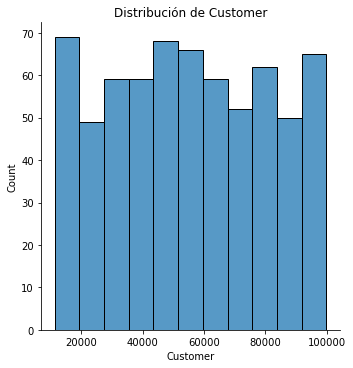

In [8]:
sns.displot(data["Customer"]).set(title="Distribución de Customer");

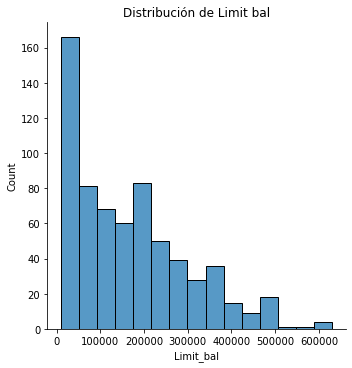

In [9]:
sns.displot(data["Limit_bal"]).set(title="Distribución de Limit bal");

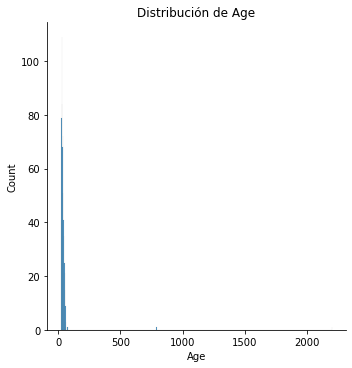

In [10]:
data= data[data["Age"] < max(data["Age"])] #Aqui se quietaron los 3 valores más altos
sns.displot(data["Age"]).set(title="Distribución de Age");

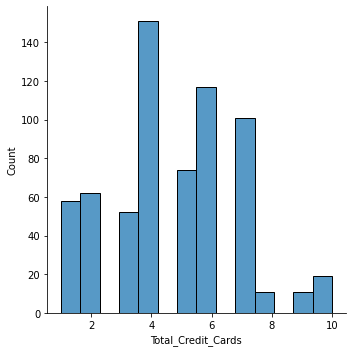

In [11]:
data= data[data["Total_Credit_Cards"] < max(data["Total_Credit_Cards"])] #Aqui se quietaron los 1 valores más altos
sns.displot(data["Total_Credit_Cards"]);

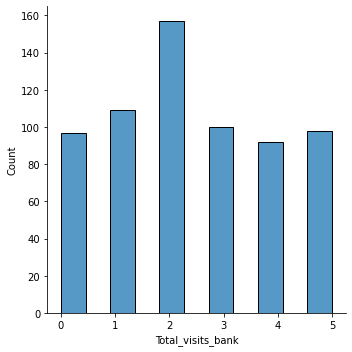

In [12]:
sns.displot(data["Total_visits_bank"]);

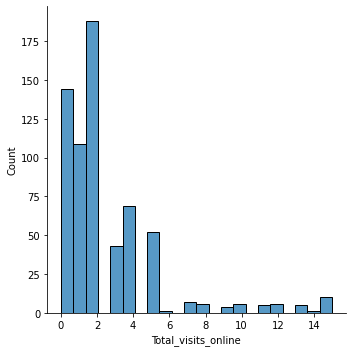

In [13]:
sns.displot(data["Total_visits_online"]);

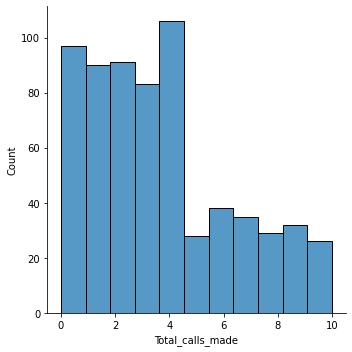

In [14]:
sns.displot(data["Total_calls_made"]);

#### Descripción de columnas numericas

In [15]:
data_numeric=data[["Customer","Limit_bal","Age","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]]
data_numeric.describe()

,Customer,Limit_bal,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,655.000000,656.000000,656.000000,656.000000,653.000000,656.000000,655.000000
mean,55107.635115,169740.853659,39.516768,4.722561,2.421133,2.599085,3.569466
std,25621.238979,129601.008060,90.023541,2.163368,1.629477,2.941558,2.868843
min,11265.000000,10000.000000,21.000000,1.000000,0.000000,0.000000,0.000000
25%,33914.000000,50000.000000,28.000000,3.000000,1.000000,1.000000,1.000000
50%,53898.000000,140000.000000,33.000000,5.000000,2.000000,2.000000,3.000000
75%,77084.500000,240000.000000,41.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,630000.000000,2202.000000,10.000000,5.000000,15.000000,10.000000


En este puonto las variables numericas percen ser normales

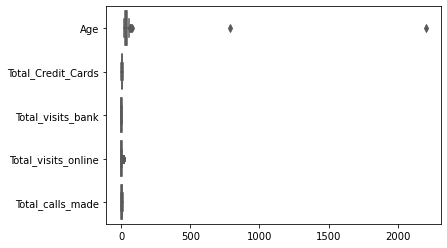

In [16]:
sns.boxplot(data=data_numeric[["Age","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]], orient="h", palette="Set2");

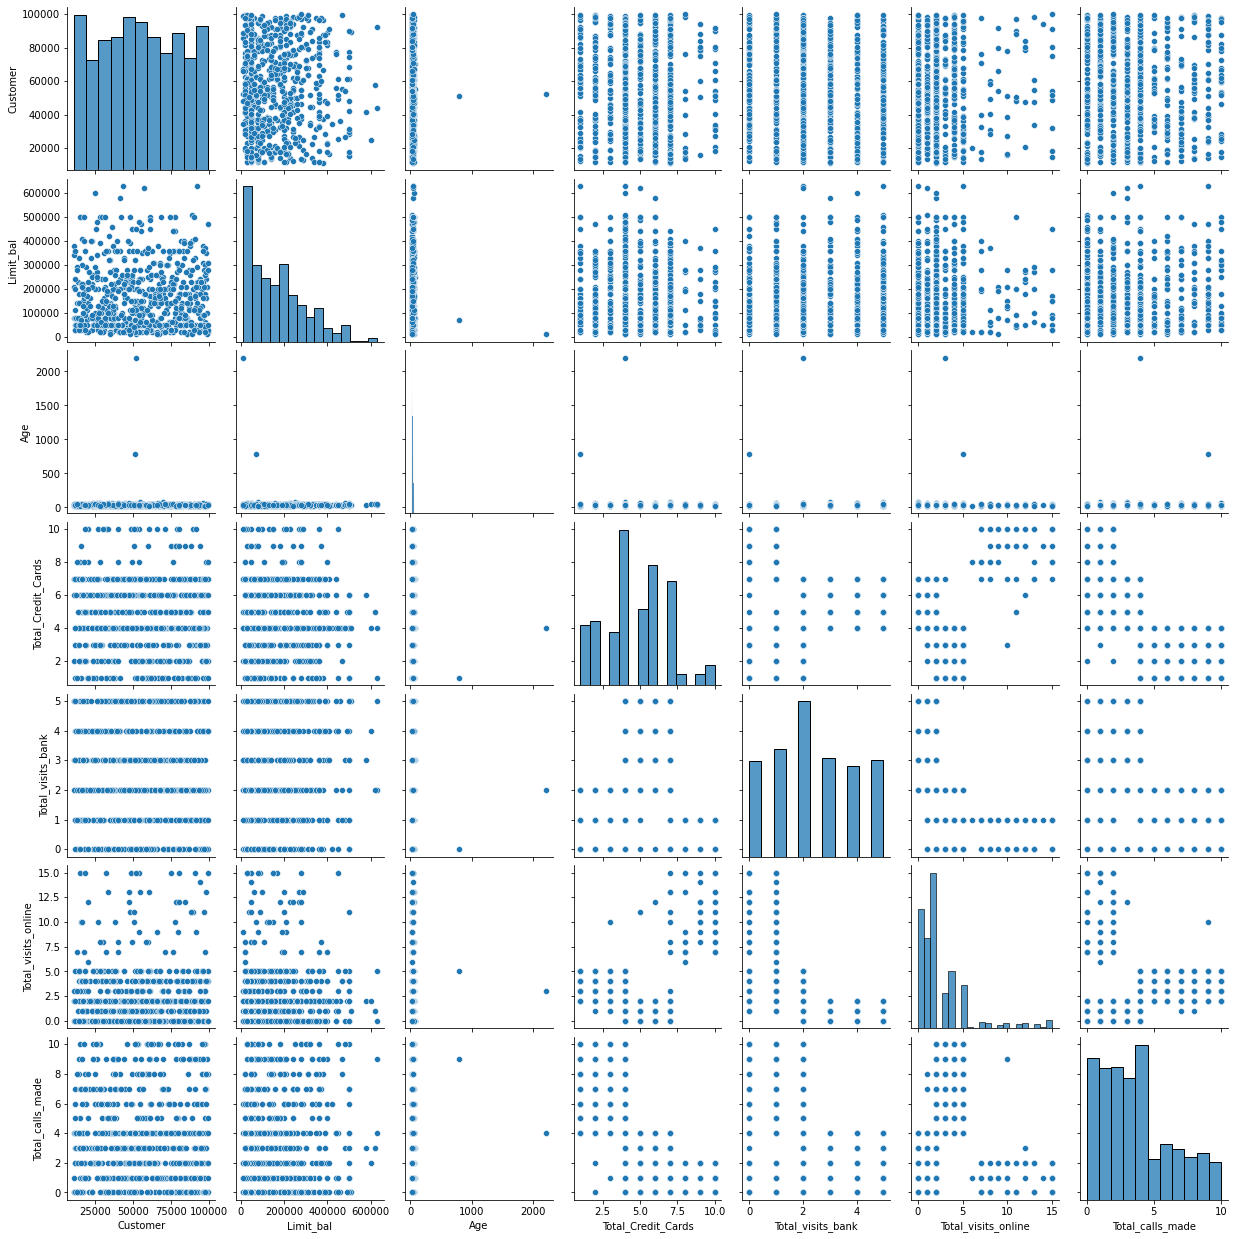

In [17]:
sns.pairplot(data=data_numeric);

Se identifican particiones en la muestra en **Total vistis online vs Total Credit Cards**, **Total vistis online vs Total calls made** , **Total Credit Cards vs. Total vists bank** y **Total calls made vs Total visits online** 

### Verificación de NA

In [18]:
data.isna().sum(axis=0)
data = data.dropna()
data

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073.0,20000.0,Female,2,Married,24.0,2.0,1.0,1.0,0.0
2,38414.0,120000.0,Female,2,Single,26.0,3.0,0.0,10.0,9.0
3,17341.0,90000.0,Female,2,Single,34.0,7.0,1.0,3.0,4.0
5,47437.0,50000.0,Male,2,Married,57.0,6.0,0.0,12.0,3.0
6,58634.0,50000.0,Male,1,Single,37.0,3.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...
656,51108.0,280000.0,Male,2,Married,39.0,10.0,1.0,10.0,0.0
657,60732.0,290000.0,Female,3,Single,27.0,10.0,1.0,13.0,2.0
658,53834.0,190000.0,Female,1,Single,28.0,8.0,1.0,9.0,1.0


### Encoding

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
labelencoder = LabelEncoder()
sex= labelencoder.fit_transform(data['Sex'])
sex = sex.reshape(len(sex),1)
sex = enc.fit_transform(sex)
sex= pd.DataFrame.sparse.from_spmatrix(sex)
sex = sex.rename(columns={0: 'Female', 1: 'Male'})
sex

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
635,0.0,1.0
636,1.0,0.0
637,1.0,0.0
638,1.0,0.0


In [24]:
edu= labelencoder.fit_transform(data['Education'])
edu = edu.reshape(len(edu),1)
edu = enc.fit_transform(edu)
edu= pd.DataFrame.sparse.from_spmatrix(edu)
edu =edu.rename(columns={0: 'L2', 1: 'L1',2:'L3',3:'L5',4:'L4'})
edu

,L2,L1,L3,L5,L4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
635,0.0,1.0,0.0,0.0,0.0
636,0.0,0.0,1.0,0.0,0.0
637,1.0,0.0,0.0,0.0,0.0
638,1.0,0.0,0.0,0.0,0.0


In [25]:
marri= labelencoder.fit_transform(data['Marriage'])
marri = marri.reshape(len(marri),1)
marri = enc.fit_transform(marri)
marri= pd.DataFrame.sparse.from_spmatrix(marri)
marri = marri.rename(columns={0: 'Married', 1: 'Single',2:'Others'})
marri

,Married,Single,Others
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
635,1.0,0.0,0.0
636,0.0,0.0,1.0
637,0.0,0.0,1.0
638,0.0,0.0,1.0


In [ ]:
data

In [31]:
sex

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
635,0.0,1.0
636,1.0,0.0
637,1.0,0.0
638,1.0,0.0


In [30]:
sex.set_index(data.index)
data[sex.columns]=sex
data

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Female,Male
Id,,,,,,,,,,,,
1,87073.0,20000.0,Female,2,Married,24.0,2.0,1.0,1.0,0.0,1.0,0.0
2,38414.0,120000.0,Female,2,Single,26.0,3.0,0.0,10.0,9.0,1.0,0.0
3,17341.0,90000.0,Female,2,Single,34.0,7.0,1.0,3.0,4.0,0.0,1.0
5,47437.0,50000.0,Male,2,Married,57.0,6.0,0.0,12.0,3.0,0.0,1.0
6,58634.0,50000.0,Male,1,Single,37.0,3.0,0.0,1.0,8.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
656,51108.0,280000.0,Male,2,Married,39.0,10.0,1.0,10.0,0.0,NaN,NaN
657,60732.0,290000.0,Female,3,Single,27.0,10.0,1.0,13.0,2.0,NaN,NaN
658,53834.0,190000.0,Female,1,Single,28.0,8.0,1.0,9.0,1.0,NaN,NaN
